# Making basic plots - Lines, bars, pies, and scatterplots

### Original Notebook by [Randal S. Olson](http://www.randalolson.com/)
### Updates to common questions by Daniel J. Quest


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Line plots

**Purpose**: Showing trends in data -- usually time series data with many time points.

**matplotlib function**: [`plot(x, y)`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)

* `x`: The x-coordinates of the lines or markers.

* `y`: The y-coordinates of the lines or markers.

''

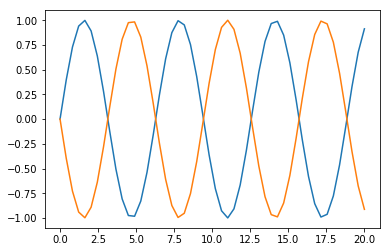

In [2]:
x = np.linspace(0, 20)
y1 = np.sin(x)
y2 = np.sin(x - np.pi)

plt.figure()

plt.plot(x, y1)
plt.plot(x, y2)
;

**Commonly used parameters**:

* `color`: Set the color of the line.

* `linestyle`: Set the line style, e.g., solid, dashed, or none.

* `linewidth`: Set the line thickness.

* `marker`: Set the marker style, e.g., circles, triangles, or none.

* `markersize`: Set the marker size.

* `label`: Set the label for the line that will show up in the legend.

''

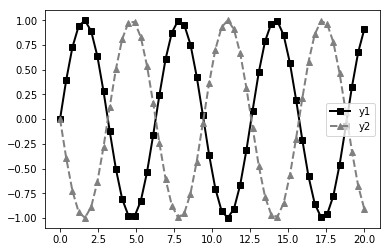

In [3]:
x = np.linspace(0, 20)
y1 = np.sin(x)
y2 = np.sin(x - np.pi)

plt.figure()

plt.plot(x,
         y1,
         color='black',
         linestyle='-',
         linewidth=2,
         marker='s',
         markersize=6,
         label='y1')

plt.plot(x,
         y2,
         color='gray',
         linestyle='--',
         linewidth=2,
         marker='^',
         markersize=6,
         label='y2')

plt.legend()
;

(0.0, 3.0, 0.0, 50.0)

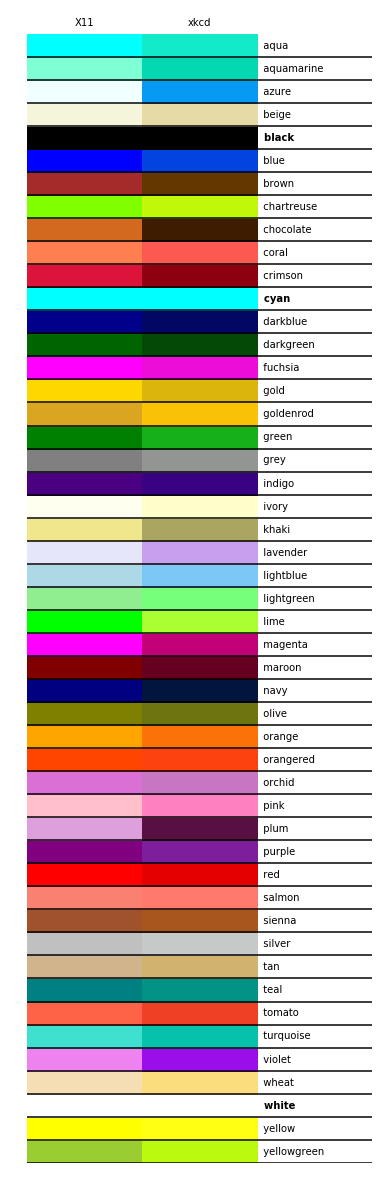

In [20]:
#color - https://blog.xkcd.com/2010/05/03/color-survey-results/
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

overlap = {name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS}

fig = plt.figure(figsize=[4.8, 16])
ax = fig.add_axes([0, 0, 1, 1])

for j, n in enumerate(sorted(overlap, reverse=True)):
    weight = None
    cn = mcd.CSS4_COLORS[n]
    xkcd = mcd.XKCD_COLORS["xkcd:" + n].upper()
    if cn == xkcd:
        weight = 'bold'

    r1 = mpatch.Rectangle((0, j), 1, 1, color=cn)
    r2 = mpatch.Rectangle((1, j), 1, 1, color=xkcd)
    txt = ax.text(2, j+.5, '  ' + n, va='center', fontsize=10,
                  weight=weight)
    ax.add_patch(r1)
    ax.add_patch(r2)
    ax.axhline(j, color='k')

ax.text(.5, j + 1.5, 'X11', ha='center', va='center')
ax.text(1.5, j + 1.5, 'xkcd', ha='center', va='center')
ax.set_xlim(0, 3)
ax.set_ylim(0, j + 2)
ax.axis('off')

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


/Users/m102417/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


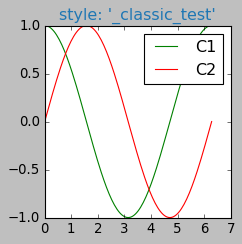

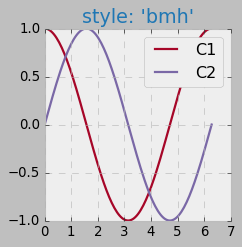

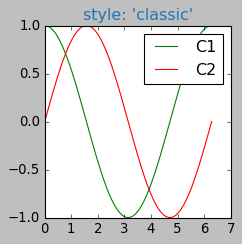

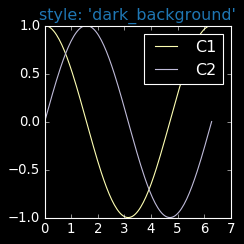

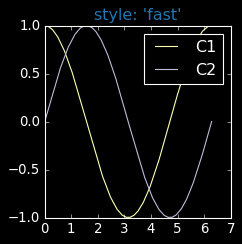

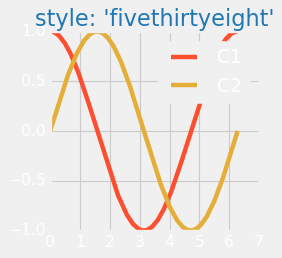

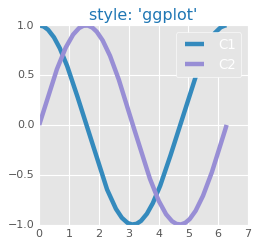

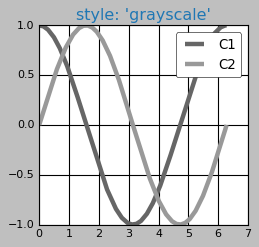

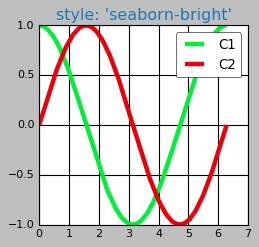

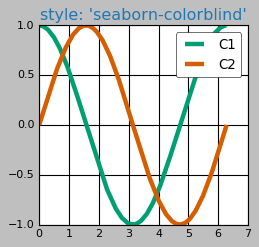

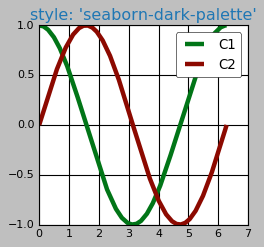

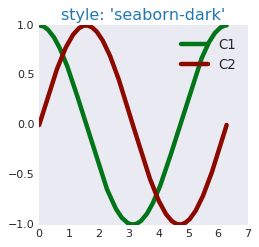

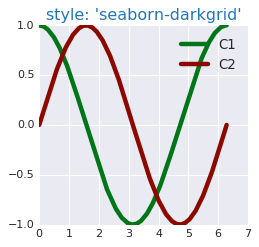

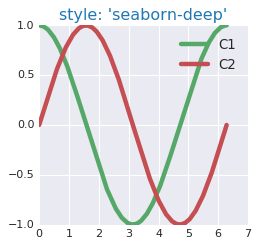

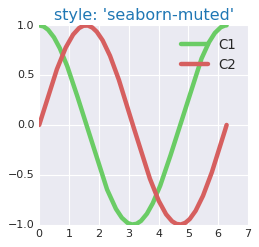

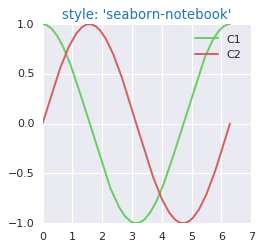

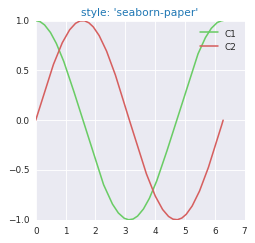

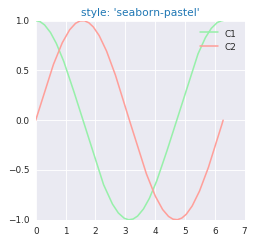

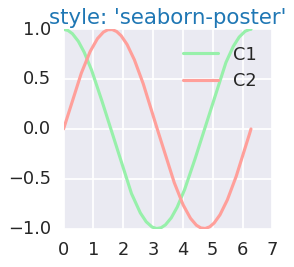

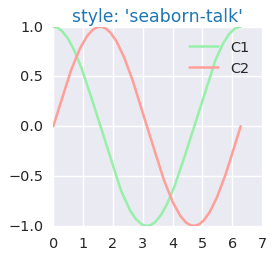

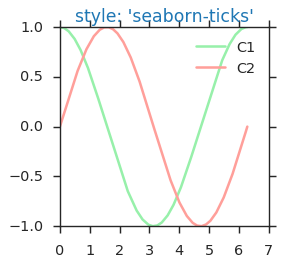

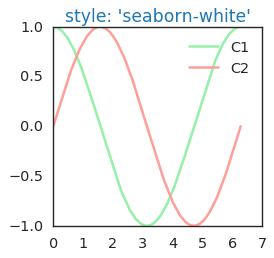

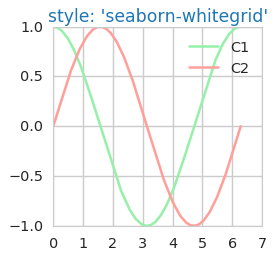

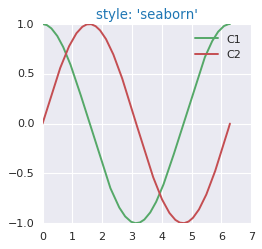

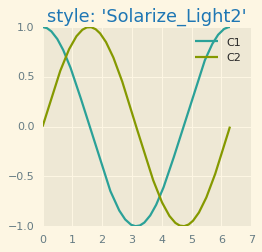

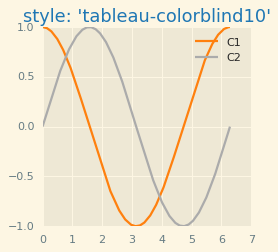

In [63]:
#basically 'default' matplotlib colors are ugly!  
# seaborn colors are better...
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
th = np.linspace(0, 2*np.pi, 128)

def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(3, 3))

    ax.set_title('style: {!r}'.format(sty), color='C0')

    ax.plot(th, np.cos(th), 'C1', label='C1')
    ax.plot(th, np.sin(th), 'C2', label='C2')
    ax.legend()

    
print(mpl.style.available)

for style in mpl.style.available:
    # e.g. demo('seaborn')
    #demo('fivethirtyeight')
    #demo('ggplot')
    demo(style)
    
#just use ggplot for now so things arn't so ugly by default
mpl.style.use('default')


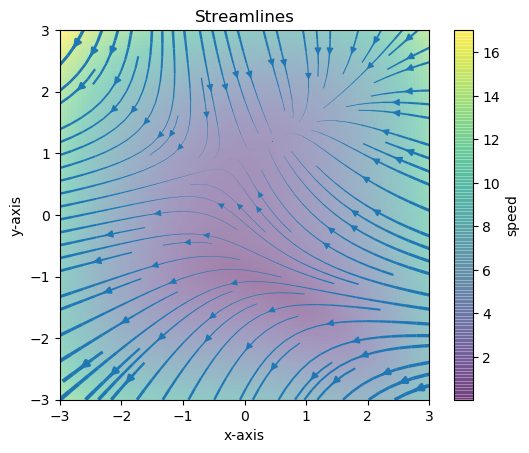

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def plotStreamlines():
    L = 3
    Y, X = np.mgrid[-L:L:100j, -L:L:100j]
    U = -1 - X**2 + Y
    V = 1 + X - Y**2
    speed = np.sqrt(U*U + V*V)

    plt.imshow(speed, extent=[-L, L, -L, L], alpha=0.5)
    plt.colorbar(label='speed')

    plt.streamplot(X, Y, U, V, linewidth=0.2*speed)

    plt.title('Streamlines')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')

    plt.show()
    
plotStreamlines()

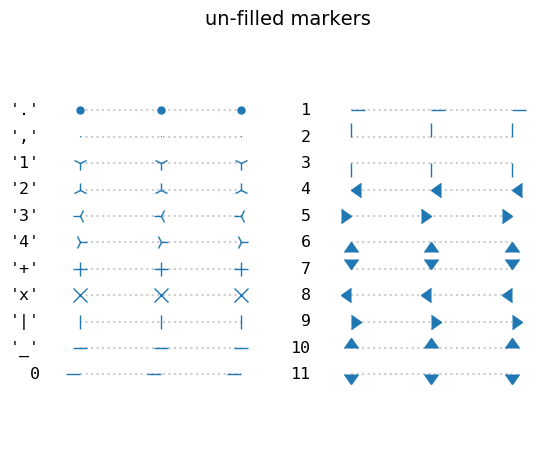

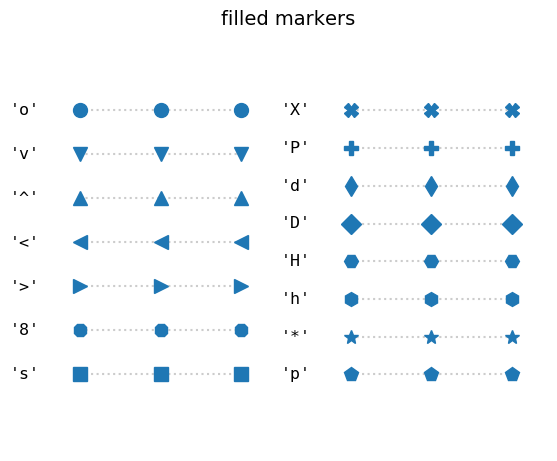

In [65]:
## Markers:
from matplotlib.lines import Line2D

points = np.ones(3)  # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    mfc="C0", mec="C0")


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def nice_repr(text):
    return repr(text).lstrip('u')


def math_repr(text):
    tx = repr(text).lstrip('u').strip("'").strip("$")
    return r"'\${}\$'".format(tx)


def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])

#Plot all un-filled markers
fig, axes = plt.subplots(ncols=2)
fig.suptitle('un-filled markers', fontsize=14)

# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)

plt.show()

# plot filled markers
fig, axes = plt.subplots(ncols=2)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('filled markers', fontsize=14)

plt.show()

#more including custom markers is here: https://matplotlib.org/gallery/lines_bars_and_markers/marker_reference.html

# Vertical bar charts

**Purpose**: Comparing categories **OR** showing temporal trends in data with few (< 4) time points.

**matplotlib function**: [`bar(left, height)`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)

* `left`: The x coordinate(s) of the left sides of the bars.

* `height`: The height(s) of the bars.

''

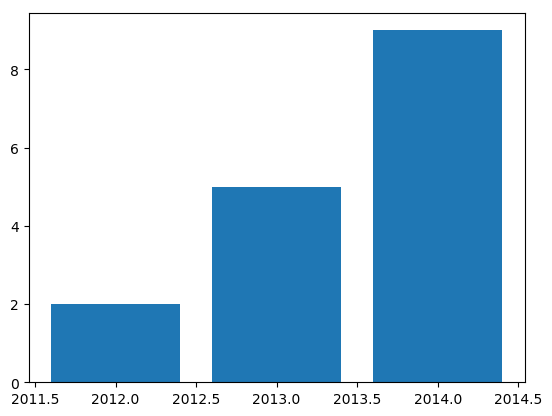

In [66]:
years = np.arange(2012, 2015)
values = [2, 5, 9]

plt.figure()

plt.bar(years, values)
;

**Commonly used parameters**:

* `color`: Set the color of the bars.

* `edgecolor`: Set the color of the lines on the edges of the bars.

* `width`: Set the width of the bars.

* `align`: Set the alignment of the bars, e.g., center them on the x coordinate(s).

* `label`: Set the label for the bar that will show up in the legend.

''

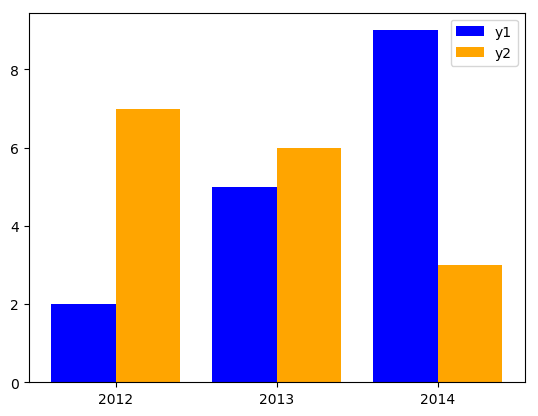

In [67]:
years = np.arange(2012, 2015)
category1_values = [2, 5, 9]
category2_values = [7, 6, 3]

plt.figure()

plt.bar(years - 0.2,
        category1_values,
        color='blue',
        edgecolor='none',
        width=0.4,
        align='center',
        label='y1')

plt.bar(years + 0.2,
        category2_values,
        color='orange',
        edgecolor='none',
        width=0.4,
        align='center',
        label='y2')

plt.xticks(years, [str(year) for year in years])

plt.legend()
;

# Horizontal bar charts

**Purpose**: Comparing categories.

**matplotlib function**: [`barh(bottom, width)`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh)

* `bottom`: The y coordinate(s) of the bars.

* `width`: The width(s) of the bars.

''

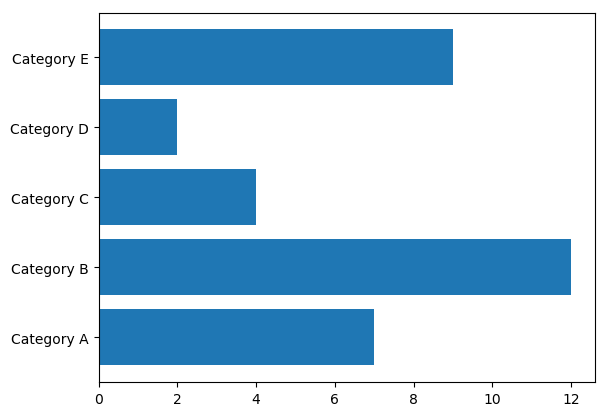

In [68]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [7, 12, 4, 2, 9]

plt.figure()

plt.barh(np.arange(len(categories)), values)

plt.yticks(np.arange(len(categories)),
           ['Category {}'.format(x) for x in categories])
;

''

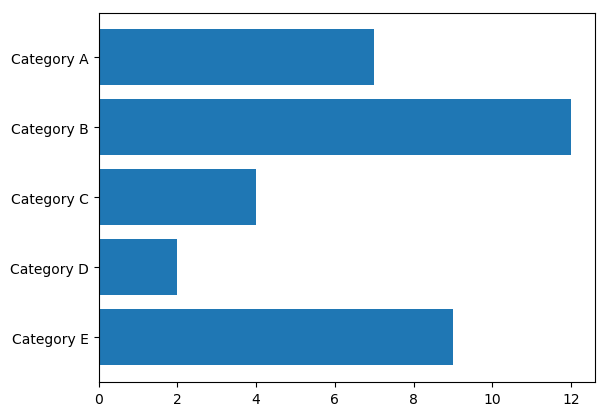

In [69]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [7, 12, 4, 2, 9]

plt.figure()

plt.barh(-np.arange(len(categories)), values)

plt.yticks(-np.arange(len(categories)),
           ['Category {}'.format(x) for x in categories])
;

**Commonly used parameters**:

* `color`: Set the color of the bars.

* `edgecolor`: Set the color of the lines on the edges of the bars.

* `height`: Set the height of the bars.

* `align`: Set the alignment of the bars, e.g., center them on the y coordinate(s).

''

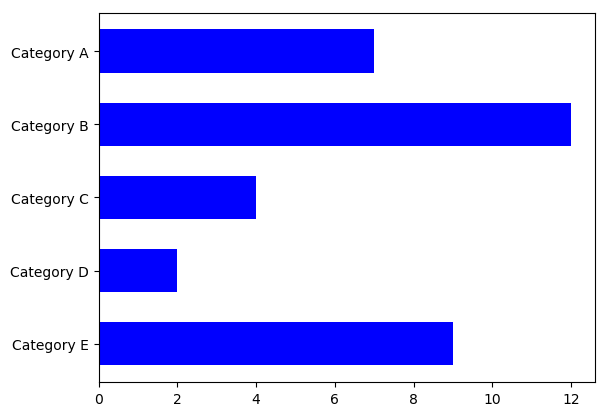

In [70]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [7, 12, 4, 2, 9]

plt.figure()

plt.barh(-np.arange(len(categories)),
         values,
         color='blue',
         edgecolor='none',
         height=0.6,
         align='center')

plt.yticks(-np.arange(len(categories)),
           ['Category {}'.format(x) for x in categories])
;

''

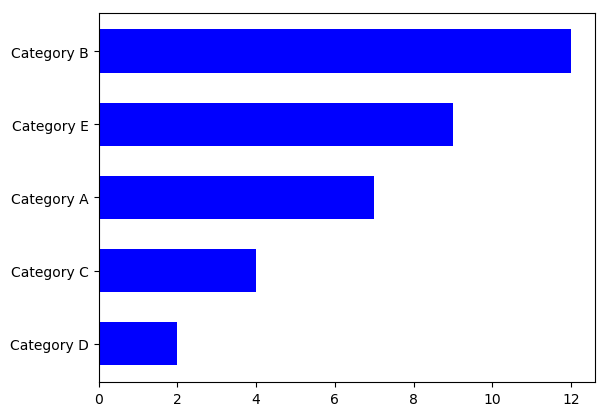

In [71]:
import pandas as pd

categories = ['A', 'B', 'C', 'D', 'E']
values = [7, 12, 4, 2, 9]

category_values = pd.DataFrame({'categories': categories,
                                'values': values})

# Note that pandas' sort function has been deprecated in version 
# 0.17 and will be removed in a future version.

# category_values.sort('values', ascending=False, inplace=True)
category_values.sort_values(by='values', ascending=False, inplace=True)

categories = category_values['categories'].values
values = category_values['values'].values

plt.figure()

plt.barh(-np.arange(len(categories)),
         values,
         color='blue',
         edgecolor='none',
         height=0.6,
         align='center')

plt.yticks(-np.arange(len(categories)),
           ['Category {}'.format(x) for x in categories])
;

# Pie charts

**Purpose**: Displaying a simple proportion.

**matplotlib function**: [`pie(sizes)`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

* `sizes`: The size of the wedges as either a fraction or number.

''

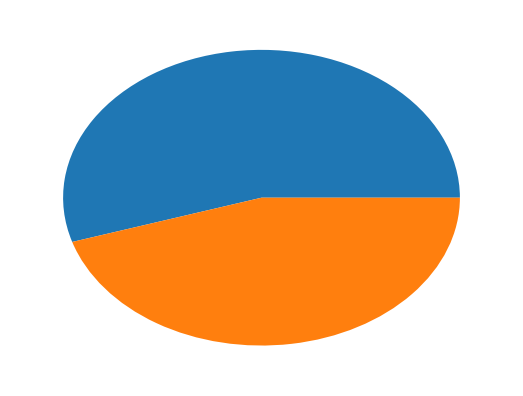

In [72]:
counts = [17, 14]

plt.figure()

plt.pie(counts)
;

''

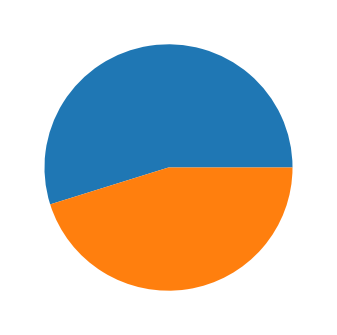

In [73]:
counts = [17, 14]

plt.figure(figsize=(4, 4))

plt.pie(counts)
;

**Commonly used parameters**:

* `colors`: Set the colors of the wedges.

* `labels`: Set the labels of the wedges.

* `startangle`: Set the angle that the wedges start at.

* `autopct`: Set the percentage display format of the wedges.

''

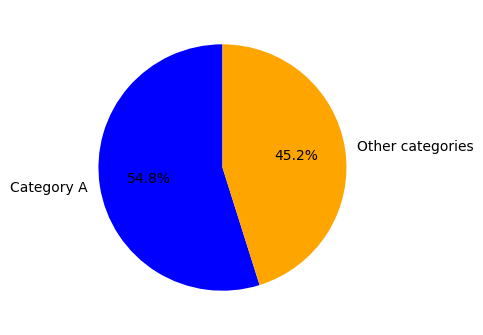

In [74]:
counts = [17, 14]

plt.figure(figsize=(4, 4))

plt.pie(counts,
        colors=['blue', 'orange'],
        labels=['Category A', 'Other categories'],
        startangle=90,
        autopct='%1.1f%%')
;

# Scatter plots

**Purpose**: Displaying relationships between variables.

**matplotlib function**: [`scatter(x, y)`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

* `x`, `y`: The values for the two variables.

''

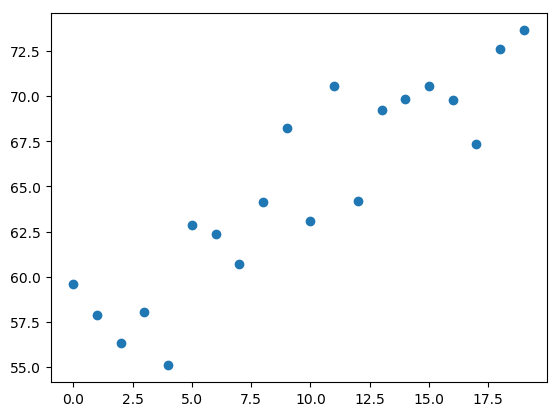

In [75]:
x = range(20)
y = np.arange(50, 70) + (np.random.random(20) * 10.)

plt.figure()

plt.scatter(x, y)
;

**Commonly used parameters**:

* `c`: Set the color of the markers.

* `s`: Set the size of the markers.

* `marker`: Set the marker style, e.g., circles, triangles, or squares.

* `edgecolor`: Set the color of the lines on the edges of the markers.

''

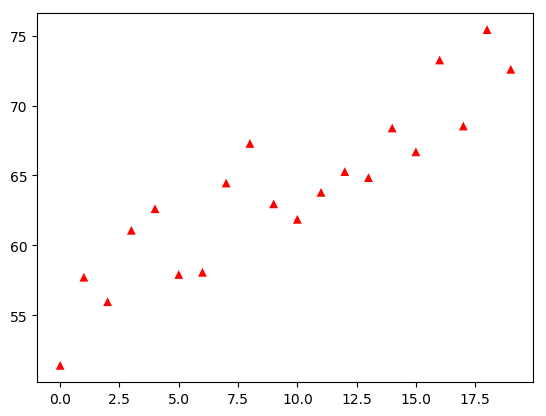

In [76]:
x = np.arange(20)
y = np.arange(50, 70) + (np.random.random(20) * 10.)

plt.figure()

plt.scatter(x,
            y,
            c='red',
            s=40,
            marker='^',
            edgecolor='none')
;

In [77]:
plt.scatter?